<a href="https://colab.research.google.com/github/Remyar12/CODSOFT/blob/main/Codsoft_Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from  sklearn.ensemble import RandomForestClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_train = pd.read_csv('/content/drive/MyDrive/Internship/fraudTrain.csv', header = 0)
data_test = pd.read_csv('/content/drive/MyDrive/Internship/fraudTest.csv', header = 0)

In [ ]:
data_train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


In [ ]:
data_test.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1.371817e+09,33.986391,-81.200714,0.0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1.371817e+09,39.450498,-109.960431,0.0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1.371817e+09,40.495810,-74.196111,0.0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1.371817e+09,28.812398,-80.883061,0.0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1.371817e+09,44.959148,-85.884734,0.0


In [ ]:
data_train.shape

(596839, 23)

In [ ]:
data_test.shape

(209534, 23)

In [ ]:
data_train.size

13727297

In [ ]:
data_test.size

4819282

In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596839 entries, 0 to 596838
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             596839 non-null  int64  
 1   trans_date_trans_time  596839 non-null  object 
 2   cc_num                 596839 non-null  int64  
 3   merchant               596839 non-null  object 
 4   category               596839 non-null  object 
 5   amt                    596839 non-null  float64
 6   first                  596839 non-null  object 
 7   last                   596839 non-null  object 
 8   gender                 596839 non-null  object 
 9   street                 596839 non-null  object 
 10  city                   596839 non-null  object 
 11  state                  596839 non-null  object 
 12  zip                    596839 non-null  int64  
 13  lat                    596839 non-null  float64
 14  long                   596839 non-nu

In [ ]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209534 entries, 0 to 209533
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             209534 non-null  int64  
 1   trans_date_trans_time  209534 non-null  object 
 2   cc_num                 209534 non-null  int64  
 3   merchant               209534 non-null  object 
 4   category               209534 non-null  object 
 5   amt                    209534 non-null  float64
 6   first                  209534 non-null  object 
 7   last                   209534 non-null  object 
 8   gender                 209534 non-null  object 
 9   street                 209534 non-null  object 
 10  city                   209534 non-null  object 
 11  state                  209534 non-null  object 
 12  zip                    209534 non-null  int64  
 13  lat                    209534 non-null  float64
 14  long                   209534 non-nu

In [ ]:
data_train.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,596839.000000,5.968390e+05,596839.000000,596839.000000,596839.000000,596839.000000,5.968390e+05,5.968380e+05,596838.000000,596838.000000,596838.000000
mean,298419.000000,4.163229e+17,70.244736,48767.568284,38.537698,-90.211653,8.911312e+04,1.337354e+09,38.537261,-90.212126,0.005777
std,172292.722994,1.307653e+18,157.723949,26907.881230,5.073720,13.766711,3.030351e+05,6.103360e+06,5.107479,13.778722,0.075788
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.325376e+09,19.029798,-166.671242,0.000000
25%,149209.500000,1.800365e+14,9.640000,26041.000000,34.668900,-96.790900,7.430000e+02,1.332354e+09,34.742478,-96.878817,0.000000
50%,298419.000000,3.520550e+15,47.400000,48154.000000,39.354300,-87.458100,2.456000e+03,1.338012e+09,39.366868,-87.411102,0.000000
75%,447628.500000,4.642255e+15,83.060000,72011.000000,41.894800,-80.138100,2.047800e+04,1.342599e+09,41.955252,-80.214022,0.000000
max,596838.000000,4.992346e+18,25086.940000,99783.000000,66.693300,-67.950300,2.906700e+06,1.347232e+09,67.510267,-66.956540,1.000000


In [ ]:
data_test.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,209534.00000,2.095340e+05,209534.000000,209534.000000,209534.000000,209534.000000,2.095340e+05,2.095330e+05,209533.000000,209533.000000,209533.000000
mean,104766.50000,4.194856e+17,69.170251,48819.862762,38.542759,-90.221215,8.846848e+04,1.374962e+09,38.540868,-90.221164,0.004224
std,60487.39999,1.312173e+18,145.440509,26859.928401,5.072480,13.738903,2.998946e+05,1.842260e+06,5.108503,13.751567,0.064853
min,0.00000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.039532,-166.671575,0.000000
25%,52383.25000,1.800429e+14,9.630000,26237.000000,34.668900,-96.798000,7.410000e+02,1.373353e+09,34.757117,-96.882677,0.000000
50%,104766.50000,3.520550e+15,47.260000,48174.000000,39.371600,-87.476900,2.435000e+03,1.374951e+09,39.373874,-87.421709,0.000000
75%,157149.75000,4.634956e+15,83.000000,72011.000000,41.948800,-80.175200,2.032800e+04,1.376587e+09,41.962731,-80.256595,0.000000
max,209533.00000,4.992346e+18,13149.150000,99783.000000,65.689900,-67.950300,2.906700e+06,1.378144e+09,66.669356,-66.952352,1.000000


In [ ]:
data_train.isnull().values.any()

True

In [ ]:
data_test.isnull().values.any()

True

In [ ]:
data_train.count()

,0
Unnamed: 0,596839
trans_date_trans_time,596839
cc_num,596839
merchant,596839
category,596839
amt,596839
first,596839
last,596839
gender,596839
street,596839


In [ ]:
data_test.count()

,0
Unnamed: 0,209534
trans_date_trans_time,209534
cc_num,209534
merchant,209534
category,209534
amt,209534
first,209534
last,209534
gender,209534
street,209534


In [ ]:
data_merged = pd.concat([data_train, data_test], axis = 0)

In [ ]:
data_merged.shape

(806373, 23)

In [ ]:
data_merged.size

18546579

In [ ]:
data_merged.drop(labels = ["first", "last", "job", "dob", "trans_num", "street", "trans_date_trans_time","city","state"], axis = 1, inplace = True)

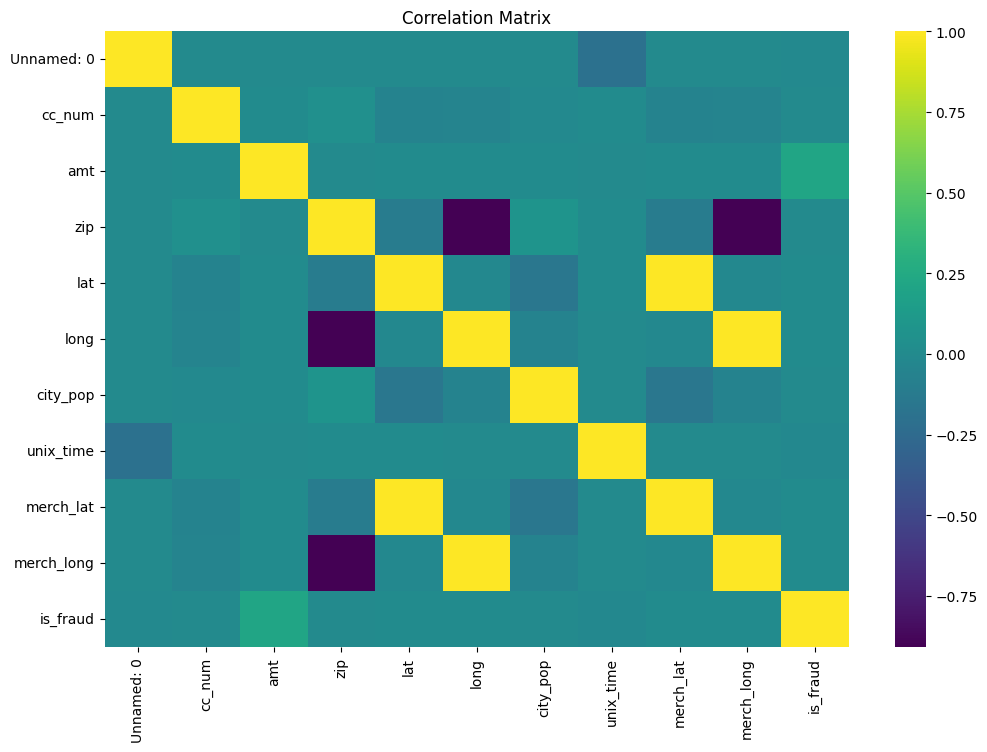

In [ ]:
numeric_data = data_merged.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='viridis', annot=False, fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
encoder = LabelEncoder()
new_coln = encoder.fit_transform(data_merged["merchant"].values)
data_merged["merchant_new"] = new_coln
data_merged.drop(labels = ["merchant"], axis = 1, inplace = True)

In [ ]:
encoder = LabelEncoder()
new_coln1 = encoder.fit_transform(data_merged["category"].values)
data_merged["category_new"] = new_coln1
data_merged.drop(labels = ["category"], axis = 1, inplace = True)

In [ ]:
data_merged = pd.get_dummies(data_merged)
data_merged.drop(labels=['gender_F'], axis = 1, inplace = True)

In [ ]:
X = data_merged.drop("is_fraud", axis = 1)
y = data_merged["is_fraud"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
log_reg_model = LogisticRegression()

In [ ]:
merged_data = pd.concat([X_train, y_train], axis=1)
merged_data_drop= merged_data.dropna()
X_train_drop = merged_data_drop.iloc[:, :-1]
y_train_drop = merged_data_drop.iloc[:, -1]   # Only the last column

# Fit the Logistic Regression model with the cleaned data
log_reg_model.fit(X_train_drop, y_train_drop)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
log_reg_predictions = log_reg_model.predict(X_test)

In [ ]:
print("Logistic Regression Model is: ")
print(confusion_matrix(y_test, log_reg_predictions))
print(classification_report(y_test, log_reg_predictions))
print("Accuracy is: ", accuracy_score(y_test, log_reg_predictions))

Logistic Regression Model is: 
[[160413      0]
 [   862      0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00    160413
         1.0       0.00      0.00      0.00       862

    accuracy                           0.99    161275
   macro avg       0.50      0.50      0.50    161275
weighted avg       0.99      0.99      0.99    161275

Accuracy is:  0.9946550922337623


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
dec_tree_model = DecisionTreeClassifier()

In [ ]:
dec_tree_model.fit(X_train_drop, y_train_drop)

DecisionTreeClassifier()

In [ ]:
dec_tree_predictions = dec_tree_model.predict(X_test)

In [ ]:
print("Decision Tree Model is: ")
print(confusion_matrix(y_test, dec_tree_predictions))
print(classification_report(y_test, dec_tree_predictions))
print("Accuracy is: ", accuracy_score(y_test, dec_tree_predictions))

Decision Tree Model is: 
[[160078    335]
 [   308    554]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    160413
         1.0       0.62      0.64      0.63       862

    accuracy                           1.00    161275
   macro avg       0.81      0.82      0.82    161275
weighted avg       1.00      1.00      1.00    161275

Accuracy is:  0.9960130212370175


In [ ]:
ran_for_model = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)

In [ ]:
ran_for_model.fit(X_train_drop, y_train_drop)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [ ]:
ran_for_predictions = ran_for_model.predict(X_test)

In [ ]:
print("Random Forest Model is: ")
print(confusion_matrix(y_test, ran_for_predictions))
print(classification_report(y_test, ran_for_predictions))
print("Accuracy is: ", accuracy_score(y_test, ran_for_predictions))

Random Forest Model is: 
[[160360     53]
 [   318    544]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    160413
         1.0       0.91      0.63      0.75       862

    accuracy                           1.00    161275
   macro avg       0.95      0.82      0.87    161275
weighted avg       1.00      1.00      1.00    161275

Accuracy is:  0.9976995814602387
